**Статистический анализ данных**

**Описание проекта**

В последние годы в крупных городах страны всё большую популярность набирают сервисы аренды самокатов. Как и у любого другого сервиса у таких компаний можно приобрести платную подписку, дающую определённые привелегии пользователям сервиса. На примере данных сервиса аренды самокатов GoFast попробуем определить, какую стратегию развития необходимо выбрать компании, чтобы достичь наилучших показателей выручки. Для этого проанализируем данные по нескольким городам в двух больших категориях пользователей - с платной подпиской и бесплатным тарифом.

**Цель исследования**

Проверить гипотезы о характере использования сервиса пользователми с подпиской и без неё, с целью вывления оптимальной стратегии развития сервиса.

**Ход исследования:**
- Подготовка данных: загрузка и изучение общей информации из представленных датасетов.
- Предобработка данных: обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
- Исследовательский анализ данных: описание и визуализация общей информации о пользователях и поездках.
- Объединение данных: объединение исходных датафреймов и создание новых, содержащих данные о пользователях с подпиской и без подписки.
- Подсчёт выручки: создание датафрейма с агрегированными данными и подсчёт ежемесячной выручки.
- Проверка гипотез: сравнение данных о расстоянии поездок, их длительности и принесенной выручке для двух категорий пользователей.


**Общий вывод:** Резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.
    
С помощью данного исследования мы стараемся дать ответ на вопрос о прибыльности увеличения числа платных подписчиков сервиса, что поможет развивать сервис GoFast в будущем.

In [1]:
import pandas as pd # импортируем необходимые бибилотеки
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv') # считываем датафреймы по данным о пользователях,
rides = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'], dayfirst=True) # их поездках
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv') # и данных о подписках

In [3]:
users.head(10) # выведем первые 10 строк датафрейма

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users.info() # выведем информацию о датафрейме с пользователями

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides.head(10) # выведем первые 10 строк датафрейма

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides.info() # выведем информацию о датафрейме с данными о поездках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [7]:
subscriptions.head(10) # выведем первые 10 строк датафрейма

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions.info() # выведем информацию о датафрейме с типом подписок

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Изучив общую информацию о представленных датафреймах, можно отметить что:
- датафреймы имеют достаточный и удобный для анализа размер (1534 и 17616 строчек);
- название колонок уже приведены к "змеиному регистру";
- тип данных для столбца date имеет нужный формат после прочтение датафрейма;
- очевидных пропусков в данных не наблюдается.

#### Шаг 2. Предобработка данных

Создадим новый столбец с номером месяца на основе столбца date.

In [9]:
rides['month'] = rides['date'].dt.month # создадим стобец с номером месяца

In [10]:
users.duplicated().sum() # найдём количество дубликатов в первом датафрейме

31

In [11]:
users = users.drop_duplicates().reset_index(drop=True) # перезапишем датафрейм без дубликатов с новыми индексами

In [12]:
users.duplicated().sum() # проверим результат

0

In [13]:
rides.duplicated().sum() # проверим второй датафрейм на наличие дубликатов

0

In [14]:
users.isna().sum() # проверим ещё раз оба датафрейма на наличие пропусков

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Проверив два датафрейма, можно отметить:
- что небольшое количество явных дубликатов в датафрейме с пользователями (31), от которых мы избавились, не повлияет сильно на размер выборки;
- в датафреймах также не было обнаружено пропусков.

Сделаем вывод, что данные представлены хорошо, и можно переходить к исследовательскому анализу.

#### Шаг 3. Исследовательский анализ данных

**3.1 Частота встречаемости городов**

In [16]:
users.groupby('city')['city'].count().sort_values(ascending=False) # оценим частоту встречаемости каждого города

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Построим столбчатую диаграмму.

[Text(0.5, 0, 'Город'),
 Text(0, 0.5, 'Количество пользователей'),
 Text(0.5, 1.0, 'Частота встречаемости городов')]

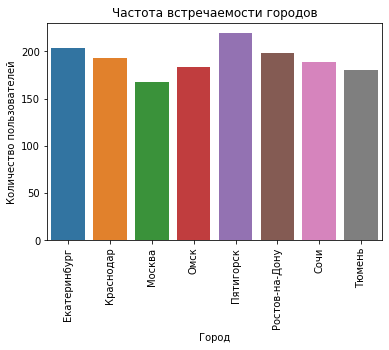

In [17]:
cities_count = users.groupby('city', as_index=False).count() # сгруппируем датасет по городам, и посчитаем их
plt.xticks(rotation=90) # повернём подписи для оси x
sns.barplot(x=cities_count['city'], y=cities_count['user_id']) \
.set(
    xlabel='Город', 
    ylabel='Количество пользователей', 
    title='Частота встречаемости городов'
) # построим диаграмму

На основе полученной таблицы и диаграммы, мы можем сделать вывод, что выборка данных равномерно описывает региональные центры, и чуть в меньшей степени столицу.

**3.2 Соотношение пользователей с подпиской и без подписки**

In [18]:
ultra_part = len(users.query('subscription_type == "ultra"')) / len(users) # найдём долю пользователей с подпиской
round(ultra_part, 2) # выведем её, округлив до сотых

0.46

In [19]:
free_part = 1-ultra_part
round(free_part, 2) # доля пользователей без подписки

0.54

<AxesSubplot:ylabel='user_id'>

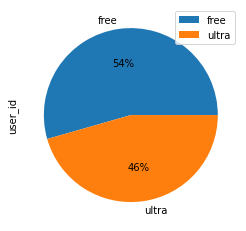

In [20]:
users.groupby('subscription_type').count().plot(kind='pie', y='user_id', autopct='%1.0f%%') # построим круговую диаграмму

По построенной диаграмме и полученным значениям отметим, что доля клиентов с подпиской ultra составляет примерно половину от общего числа пользователей.

**3.3 Возраст пользователей**

In [21]:
users['age'].describe() # воспользуемся методом describe для описания данных о возрасте

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Получив описание данных, можно заметить, что максимальный возраст пользователей - 43 года, а минимальный - 12 лет. Построим гистограмму, чтобы оценить количество клиентов в каждой группе.

[Text(0.5, 1.0, 'Гистограмма возрастов')]

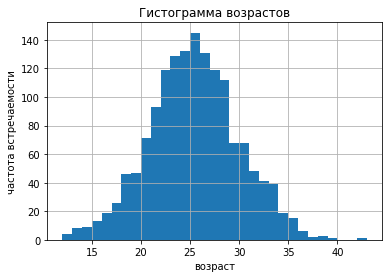

In [22]:
plt.xlabel("возраст")
plt.ylabel("частота встречаемости")
users['age'].hist(bins=31).set(title='Гистограмма возрастов')

Изучив гистограмму можно отметить, что пользователей старше 37 лет практически нет. Наблюдается также незначительный всплеск количества пользователей в возрасте 43 года. Оценим их количество.

In [23]:
round(len(users.query('age > 37')) / len(users), 3) # посчитаем долю клиентов 37+

0.003

Таким образом, можно отметить что:
- доля клиентов 37+ составляет менее 1%, она не повлияет на общий результат;
- средний возраст пользователей составляет 25 лет

**3.4 Расстояние, которое пользователь преодолел за одну поездку**

In [24]:
rides['distance'].describe() # выведем описание данных о расстоянии поездок

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

[Text(0.5, 1.0, 'Гистограмма дистанций поездок')]

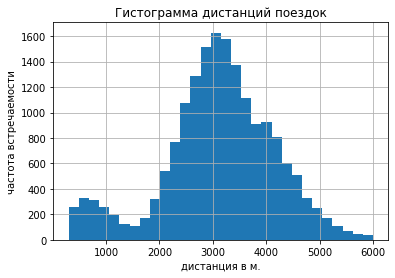

In [25]:
plt.xlabel("дистанция в м.")
plt.ylabel("частота встречаемости")
rides['distance'].hist(bins=30, range=(300,6000)).set(title='Гистограмма дистанций поездок')
# построим гистограмму, отбросив значения менее 300 и более 6000 метров

In [26]:
round(len(rides.query('300 < distance < 6000')) / len(rides), 2) #найдём долю данных без аномально коротких и длинных расстояний

0.98

Доля аномальных коротких и длинных поездок составила около 2% от общего числа значений. Это не повлияет на дальнейшее исследование.

По полученным данным и построенной диаграмме можно отметить:
- что средняя дистанция поездок составляет примерно 3100 метров. Также наблюдается небольшой пик значений в районе 500-600 метров (вероятно это популярная средняя дистанция среди коротких поездок);
- минимальное расстояние поездки составило 0,8 метров - скорее всего поездка не состоялась;
- также есть аномально дальние поездки более 6000 метров, но их доля не велика, что позволило продолжить исследование.

**3.5 Продолжительность поездок**

In [27]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

[Text(0.5, 1.0, 'Гистограмма продолжительности поездок')]

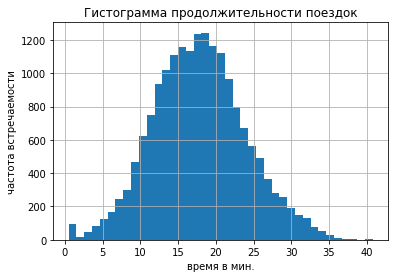

In [28]:
plt.xlabel("время в мин.")
plt.ylabel("частота встречаемости")
rides['duration'].hist(bins=39).set(title='Гистограмма продолжительности поездок')

По полученным данным видно, что параметр длительности поездок распределён нормально. Можно отметить, что поездок длинее 35 минут и короче 2,5 минут практически не было. Найдём долю этих поездок.

In [29]:
round(len(rides.query('2.5 < duration < 35')) / len(rides), 2) # найдём долю поездок без аномально коротких и длинных сессий

0.99

Доля аномальных коротких и аномально длинных сессий сотавила около 1%, это не повлияет на результаты исследования.

На основе полученных данных можно сделать вывод, что средняя длительность поездки составлет примерно 17 минут. Так же встречаются поездки длительностью менее 1 минуты (возможно клиент передумал) или длительностью около 40 минут - настоящие фанаты электросамокатов)))

#### Шаг 4. Объединение данных

**4.1 Объединение данных о пользователях, поездках и подписках в один датафрейм.**

Оценим размерность датасетов перед объединением.

In [30]:
len(users) # количество строк в датафрейме с пользователями

1534

In [31]:
len(rides) # количество строк в датафрейме с поездками

18068

После объединения в новый датафрейм количетсво его строк должно соответсвовать числу поездок (пользователь может повторяться, а каждая поездка уникальна). 

In [32]:
df = users.merge(rides, on='user_id', how='outer') # объединим первый и второй датафрейм,
df = df.merge(subscriptions, on='subscription_type', how='outer') # а затем полученный датафрейм с третьим
display(df.head()) # выведем первые 5 строк полученного датафрейма
len(df) # проверим количество строк

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


18068

In [33]:
len(df) # длина нового датафрейма совпадает с числом поездок

18068

Проверим новый датафрейм на пропущенные значения.

In [34]:
df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Объединение прошло корректно, пропусков не обнаружено.

**4.2 Создание дополнительных датафреймов.**

In [35]:
free_type = df.query('subscription_type == "free"') # создадим датафрейм с пользователями без платной подписки

In [36]:
ultra_type = df.query('subscription_type == "ultra"') # создадим датафрейм с пользователями с платной подпиской

**4.3 Визуализация информации о времени и расстоянии поездок для клиентов с подпиской и без неё.**

In [37]:
free_type['duration'].describe() # описание длительности поездок в категории free

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [38]:
ultra_type['duration'].describe() # описание длительности поездок в категории ultra

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Text(0, 0.5, 'частота встречаемости')

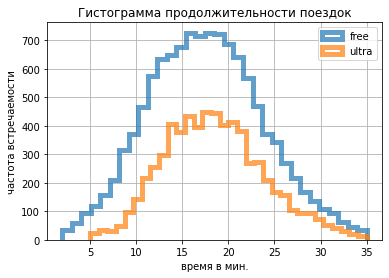

In [39]:
ax = free_type.plot( # построим гистограмму сразу для двух категорий по данным о длительности поездок
    kind='hist',
    y='duration',
    histtype='step',
    range=(2, 35),
    bins=32,
    linewidth=5,
    alpha=0.7,
    label='free',
)

plt.xlabel("время в мин.")

ultra_type.plot(
    kind='hist',
    y='duration',
    histtype='step',
    range=(5,35),
    bins=32,
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
).set(title='Гистограмма продолжительности поездок')
plt.xlabel("время в мин.")
plt.ylabel("частота встречаемости")

На основе полученных данных можно сказать, что время поездки распределено примерно одинаково для двух категорий, с поправкой на разное количество людей с подпиской и без.

In [40]:
free_type['distance'].describe() # описание дистаниций поездок в категории free

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [41]:
ultra_type['distance'].describe() # описание дистаниций поездок в категории ultra

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Text(0, 0.5, 'частота встречаемости')

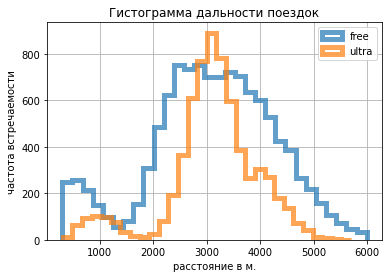

In [42]:
ax_2 = free_type.plot( # построим гистограмму сразу для двух категорий по данным о расстояниях
    kind='hist',
    y='distance',
    histtype='step',
    range=(300, 5991),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='free',
)

ultra_type.plot(
    kind='hist',
    y='distance',
    histtype='step',
    range=(307,5700),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax_2,
    grid=True,
    legend=True,
).set(title='Гистограмма дальности поездок')
plt.xlabel("расстояние в м.")
plt.ylabel("частота встречаемости")

По полученным данным для двух категорий, можно отметить, что распределение пользоватаелей с подпиской имеет более "нормальный" вид, но в целом для двух категорий наблюдаются примерные одинаковые тенденции со средней дистанцией поездки и максимальным и минимальным её значениями.

#### Шаг 5. Подсчёт выручки

**5.1  Создание датафрейма с агрегированными данными о поездках для каждого пользователя.**

In [43]:
sum_df = (
    df.groupby(['user_id', 'month', 'subscription_type'], as_index=False)  #сгруппируем данные по нескольким столбцам
    .agg({'distance':['sum', 'count'], 'duration':'sum'})
)#посчитав суммарную дистанцию, количество поездок и общую длительность
sum_df['duration'] = np.ceil(sum_df['duration']) # округлим значения продолжительности поездок
sum_df.columns = sum_df.columns.map('_'.join) #избавимся от мультииндекса и переименуем столбцы, убрав лишние подчёркивания
sum_df = sum_df.rename(columns={'user_id_':'user_id', 'month_': 'month', 'subscription_type_': 'subscription_type'})
sum_df.head() 

,user_id,month,subscription_type,distance_sum,distance_count,duration_sum
0,1,1,ultra,7027.511294,2,42.0
1,1,4,ultra,754.159807,1,7.0
2,1,8,ultra,6723.470560,2,45.0
3,1,10,ultra,5809.911100,2,32.0
4,1,11,ultra,7003.499363,3,54.0


**5.2 Расчёт помесячной выручки с каждого пользователя.**

In [44]:
display(subscriptions) # напомним условия использования сервиса с подпиской и без

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Воспользуемся методом loc и добавим столбец revenue с расчётами помесячной выручки для двух типов подписок.

In [45]:
sum_df.loc[sum_df['subscription_type'] == 'free', 'revenue'] = 50*sum_df['distance_count'] + 8*sum_df['duration_sum'] 
sum_df.loc[sum_df['subscription_type'] == 'ultra', 'revenue'] = 6*sum_df['duration_sum'] + 199
sum_df.head()

,user_id,month,subscription_type,distance_sum,distance_count,duration_sum,revenue
0,1,1,ultra,7027.511294,2,42.0,451.0
1,1,4,ultra,754.159807,1,7.0,241.0
2,1,8,ultra,6723.470560,2,45.0,469.0
3,1,10,ultra,5809.911100,2,32.0,391.0
4,1,11,ultra,7003.499363,3,54.0,523.0


In [46]:
sum_df['revenue'].describe() # оценим, как распределена выручка в полученных данных

count    11331.000000
mean       340.100344
std        151.127485
min         58.000000
25%        234.000000
50%        319.000000
75%        412.000000
max       1428.000000
Name: revenue, dtype: float64

По полученным данным можно отметить, что минимальное значение помесячной выручки составило 74 рубля, а максимальное - 1350 рублей. Средняя сумма помесячной выручки составила 339 рублей.

#### Шаг 6. Проверка гипотез

**6.1 Сравнение времени поездок для двух категорий пользователей.**

In [47]:
df.query('subscription_type == "free"')['duration'].mean()

17.39090929866399

*Сформулируем нулевую и альтернативную гипотезы.*

* H0 - пользователи с подпиской тратят меньшее либо равное время на поездки, чем пользователи без подписки;
* H1 - пользователи с подпиской тратят значимо большее время на поездки.

In [48]:
alpha = 0.05 # уровень статистической значимости

In [49]:
ultra_dur_group = df.query('subscription_type == "ultra"')['duration'] # сделаем срезы по длительности поездок для пользователей
free_dur_group = df.query('subscription_type == "free"')['duration'] # с подпиской и без подписки

Проверим одностороннюю гипотезу для средних двух генеральных совокупностей.

In [50]:
results = st.ttest_ind(ultra_dur_group, free_dur_group, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Не будем использовать дополнительный параметр equal_var=False, потому что у нас достаточно большие и примерно одинаковые по размеру выборки, к тому же в обеих измерена одна и та же переменная. Нет оснований полагать, что разброс будет сильно отличаться.

Таким образом, получается, что пользователи с подпиской действительно тратят больше времени на поездки в среднем чем пользователи без подписки.

**6.2 Проверка гипотезы о среднем расстоянии поездок пользователей.**

Сформулируем нулевую и альтернативную гипотезы.

* H0 - расстояние, которое проезжают пользователи с подпиской за одну поездку меньше или равно 3130 метров;
* H1 - расстояние, которое проезжают пользователи с подпиской за одну поездку значимо больше 3130 метров.

In [51]:
interested_value = 3130 # оптимальное расстояние одной поездки
alpha = 0.05 # укажите уровень статистической значимости
ultra_distance = df.query('subscription_type == "ultra"')['distance'] # срез по дальности поездок подписчиков сервиса 

In [52]:
results_2 = st.ttest_1samp(ultra_distance, interested_value, alternative='greater') 

In [53]:
print('p-значение:', results_2.pvalue) # выведем p-value
if results_2.pvalue < alpha: # сравним полученный p-value и уровень значимости
    print('Отвергаем нулевую гипотезу: среднее расстояние значимо больше 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: пользователи ultra проезжают не более 3130 метров в среднем.')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: пользователи ultra проезжают не более 3130 метров в среднем.


**6.3 Сравнение помесячной выручки по категориям.**

Сформулируем нулевую и альтернативную гипотезы.

* H0 - пользователи с подпиской приносят меньшую либо равную выручку, чем пользователи без подписки;
* H1 - пользователи с подпиской приносят значимо большую выручку, чем пользователи без неё.

In [54]:
alpha = 0.05 # уровень статистической значимости

In [55]:
ultra_rev_group = sum_df.query('subscription_type == "ultra"')['revenue'] # сделаем срезы по помесячной выручке
free_rev_group = sum_df.query('subscription_type == "free"')['revenue'] # для пользователей с подпиской и без подписки

Проверим одностороннюю гипотезу для средних двух генеральных совокупностей.

In [56]:
results_3 = st.ttest_ind(ultra_rev_group, free_rev_group, equal_var=False, alternative='greater')
print('p-значение:', results_3.pvalue)
if results_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

p-значение: 1.0718729651261336e-44
Отвергаем нулевую гипотезу


Тест показывает, что пользователи с подпиской приносят большую помесячную выручку, чем пользователи без подписки. Оценим также эти данные с помощью средних значений выручки для каждой категории.

In [57]:
sum_df.loc[sum_df['subscription_type'] == 'ultra', 'revenue'].mean() # средняя выручка пользователей ultra

361.48180013236265

In [58]:
sum_df.loc[sum_df['subscription_type'] == 'free', 'revenue'].mean() # средняя выручка пользователей free

325.84289496910856

Таким образом, пользователи с подпиской действительно приносят большую выручку, чем пользователи без подписки.

**6.4 Ответ на вопрос об обновлении сервера.**

Для проверки гипотезы о снижении количества обращений в поддержку после обновления серверов подойдёт двухвыборочный t-тест для зависимых выборок. Мы будем проверять одностороннюю гипотезу о снижении количества обращений после обновления.

**ВЫВОДЫ:**

В данной работе было проведено исследование о пользователях сервиса аренды самокатов GoFast. В начале исследования обнаружено, что в предоставленных данных примерно одинаковое число пользователей с платной подпиской и без неё (46% и 54% соответсвенно).
На следующих этапах проведена оценка возраста пользователей (средний возраст составил примерно 25 лет), расстояния одной поездки (в среднем 3070 метров) и её длительность (около 18 минут).

Далее полученные данные были поделены на два датафрейма (пользователи с подпиской и без неё). Проанализировав данные этих датафреймов, можно отметить, что среднее время поездки подписчика ultra и пользователя free тарифа составило 18.5 и 17.7 секунд соответсвенно, а среднее расстояние поездки - 3111 и 3092 метра соответсвенно.

Затем на основании созданного датафрейма с агрегированными данными о поездках для каждого пользователя был произведен рассчёт помесячной выручки, который показал что среднее её значение составляет 339 рублей (при минимальном - 74 рубля и максимальном - 1350 рублей).

На завершающем этапе были сформулированы 3 гипотезы о поведении пользователей с подпиской и без. После проведенного анализа, отметим, что:
- пользователи с подпиской ultra тратят больше времени на поездки в среднем чем пользователи без подписки (на 1 минуту);
- расстояние, которое проезжают пользователи с подпиской ultra за одну поездку, обычно не превышает 3130 метров;
- пользователи с подпиской приносят большую помесячную выручку, чем пользователи без подписки (в среднем более чем на 30 рублей).

Таким образом сервису стоит увеличивать количество платных подписчиков за счёт проведения акций.